In [65]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
from bs4 import BeautifulSoup

from sklearn.preprocessing import StandardScaler

from scipy.sparse import coo_matrix, hstack
from sklearn.decomposition import TruncatedSVD

In [80]:
#Dataset loading
def load_obj(name):
    with open('corpusprepared.pkl', 'rb') as f:
        return pickle.load(f)
picklecorpus = load_obj('picklecorpus')

#TextAnalysis = picklecorpus['TextAnalysis']
#TitleAnalysis = picklecorpus['TitleAnalysis']
#CodeAnalysis = picklecorpus['CodeAnalysis']

In [90]:
#Prints all the parameters

for segment in picklecorpus:
    print(segment)
    for key in picklecorpus[segment]:
        params = picklecorpus.get(segment, None)[key]['parameters']
        datashape = picklecorpus.get(segment, None)[key]['Word_freq'].shape
        print('{} - {}\n    Datashape : {}\n'.format(key , params, datashape))

CodeAnalysis
0 - {'max_df': 0.8, 'min_df': 2, 'ngram_range': (1, 1)}
    Datashape : (50000, 66168)

1 - {'max_df': 0.8, 'min_df': 2, 'ngram_range': (1, 2)}
    Datashape : (50000, 342882)

2 - {'max_df': 0.8, 'min_df': 2, 'ngram_range': (2, 2)}
    Datashape : (50000, 276714)

3 - {'max_df': 0.8, 'min_df': 10, 'ngram_range': (1, 1)}
    Datashape : (50000, 12067)

4 - {'max_df': 0.8, 'min_df': 10, 'ngram_range': (1, 2)}
    Datashape : (50000, 38951)

5 - {'max_df': 0.8, 'min_df': 10, 'ngram_range': (2, 2)}
    Datashape : (50000, 26884)

6 - {'max_df': 1.0, 'min_df': 2, 'ngram_range': (1, 1)}
    Datashape : (50000, 66168)

7 - {'max_df': 1.0, 'min_df': 2, 'ngram_range': (1, 2)}
    Datashape : (50000, 342882)

8 - {'max_df': 1.0, 'min_df': 2, 'ngram_range': (2, 2)}
    Datashape : (50000, 276714)

9 - {'max_df': 1.0, 'min_df': 10, 'ngram_range': (1, 1)}
    Datashape : (50000, 12067)

10 - {'max_df': 1.0, 'min_df': 10, 'ngram_range': (1, 2)}
    Datashape : (50000, 38951)

11 - {'ma

In [91]:
#Dataset definition
iterations = {'CodeAnalysis':7, 'TitleAnalysis':7, 'TextAnalysis':7}

#parameter verification
for key in iterations.keys():
    params = picklecorpus.get(key, None)[iterations[key]]['parameters']
    print('Parameter for text {} --> {}'.format(key, params))
    datashape = picklecorpus.get(key, None)[iterations[key]]['Word_freq'].shape
    print('dataset shape : {}'.format(datashape))

Parameter for text CodeAnalysis --> {'max_df': 1.0, 'min_df': 2, 'ngram_range': (1, 2)}
dataset shape : (50000, 342882)
Parameter for text TitleAnalysis --> {'max_df': 1.0, 'min_df': 5, 'ngram_range': (1, 2)}
dataset shape : (50000, 9835)
Parameter for text TextAnalysis --> {'max_df': 1.0, 'min_df': 5, 'ngram_range': (1, 2)}
dataset shape : (50000, 75611)


In [38]:
#dataset creation
Titleset = picklecorpus.get('TitleAnalysis', None)[iterations['TitleAnalysis']]['Word_freq']
Textset = picklecorpus.get('TextAnalysis', None)[iterations['TextAnalysis']]['Word_freq']
Codeset = picklecorpus.get('CodeAnalysis', None)[iterations['CodeAnalysis']]['Word_freq']

X = hstack((Titleset, Textset, Codeset))

X.shape

(50000, 428328)

In [61]:
#Main tag loading
def load_obj(name):
    with open('maintaglist.pkl', 'rb') as f:
        return pickle.load(f)
maintaglist = load_obj('maintaglist')
maintaglist

{'.net': 18,
 'ajax': 27,
 'android': 5,
 'angularjs': 20,
 'arrays': 19,
 'asp.net': 14,
 'c': 17,
 'c#': 3,
 'c++': 9,
 'css': 11,
 'html': 8,
 'ios': 10,
 'iphone': 23,
 'java': 2,
 'javascript': 1,
 'jquery': 6,
 'json': 21,
 'mysql': 12,
 'node.js': 25,
 'objective-c': 16,
 'php': 4,
 'python': 7,
 'r': 24,
 'regex': 28,
 'ruby': 26,
 'ruby-on-rails': 15,
 'sql': 13,
 'sql-server': 22,
 'swift': 29,
 'xml': 30}

In [72]:
#dataloading

#To copy paste in the list of parameters below to limit the dataset size
#postsdf = pd.read_csv('posts with tags.csv', nrows = 50, index_col=0, parse_dates=['CreationDate', 'DeletionDate', 'LastEditDate', 'LastActivityDate', 'ClosedDate'])

#complete loading
postsdf = pd.read_csv('posts with tags.csv', index_col=0, parse_dates=['CreationDate', 'DeletionDate', 'LastEditDate', 'LastActivityDate', 'ClosedDate'])
postsdf.head()

,PostTypeId,AcceptedAnswerId,ParentId,CreationDate,DeletionDate,Score,ViewCount,Body,OwnerUserId,OwnerDisplayName,...,LastEditorDisplayName,LastEditDate,LastActivityDate,Title,Tags,AnswerCount,CommentCount,FavoriteCount,ClosedDate,CommunityOwnedDate
Id,,,,,,,,,,,,,,,,,,,,,
48046688,1,NaN,NaN,2018-01-01 01:43:05,NaT,0,32,<p>Hi I was trying to install a python package...,9159552.0,NaN,...,NaN,2018-01-01 02:50:41,2018-01-01 02:50:41,tried to install a pythonn package but encount...,<python><gcc>,0,0,NaN,NaT,NaN
48046690,1,NaN,NaN,2018-01-01 01:44:46,NaT,0,39,<p>I am trying to make a chrome extension that...,9159517.0,NaN,...,NaN,2018-01-01 16:59:50,2018-01-01 16:59:50,Update chrome extension popup text,<javascript><html><google-chrome-extension>,0,3,NaN,NaT,NaN
48046378,1,NaN,NaN,2018-01-01 00:00:29,NaT,0,39,<p>Calling a <em>dll</em> from Python using <e...,8276973.0,NaN,...,NaN,2018-01-01 03:16:54,2018-01-03 08:21:23,Python ctypes: how to pass ctypes array to DLL?,<python><ctypes>,2,0,NaN,NaT,NaN
48046379,1,NaN,NaN,2018-01-01 00:00:32,NaT,0,390,<p>I have a Django app with which users can cr...,1745384.0,NaN,...,NaN,2018-01-01 03:18:33,2018-01-11 23:14:31,nginx gunicorn 502 bad gateway: upstream prema...,<python><django><nginx>,1,0,1.0,NaT,NaN
48046382,1,NaN,NaN,2018-01-01 00:00:52,NaT,0,44,<p>I'm trying to implement hittest that is use...,8794406.0,NaN,...,NaN,NaT,2018-01-01 00:00:52,Implementing hit test,<c++><opencv><3d><computer-vision><arkit>,0,0,NaN,NaT,NaN


In [73]:
#Tags parsing on dataset

def maintagclass(entry):
    for tag in entry:
        if tag in maintaglist:
            return maintaglist[tag]
    return -1

postsdf['PTags'] = postsdf['Tags'].apply(lambda x: [tag.name for tag in BeautifulSoup(x, 'html.parser').find_all()])
postsdf['MainTag'] = postsdf['PTags'].apply(maintagclass)
postsdf[['MainTag', 'PTags', 'Tags']].head(20)

,MainTag,PTags,Tags
Id,,,
48046688,7,"[python, gcc]",<python><gcc>
48046690,1,"[javascript, html, google-chrome-extension]",<javascript><html><google-chrome-extension>
48046378,7,"[python, ctypes]",<python><ctypes>
48046379,7,"[python, django, nginx]",<python><django><nginx>
48046382,9,"[c++, opencv, computer-vision, arkit]",<c++><opencv><3d><computer-vision><arkit>
48046691,-1,"[python-3.x, validation, tkinter, tkinter-entry]",<python-3.x><validation><tkinter><tkinter-entry>
48046692,13,"[sql, sql-server, ssas, ssas-2012]",<sql><sql-server><ssas><ssas-2012>
48046694,2,"[java, android, caching, sharedpreferences]",<java><android><caching><sharedpreferences>
48046383,-1,[karate],<karate>


In [45]:
#Data standardisation
scaler = StandardScaler(with_mean=False)

Xscaled = scaler.fit_transform(X)

/Users/cricket/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [105]:
#TruncatedSVD calculation
svd = TruncatedSVD(n_components=2, n_iter=7, random_state=42)
Xsvd = svd.fit_transform(X)
Xsvd.shape

(50000, 2)

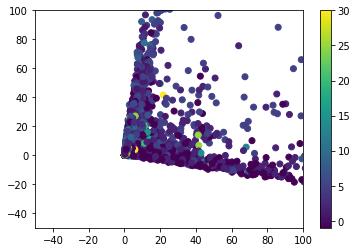

In [108]:
#results visualisation

plt.scatter(Xsvd[:, 0], Xsvd[:, 1], c = postsdf['MainTag'])

plt.xlim([-50, 100])
plt.ylim([-50, 100])
plt.colorbar()
plt.show()


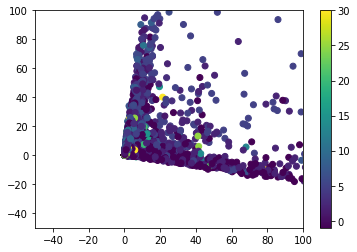

In [109]:
#Analysis limited to the code

#Data standardisation
#scalercode = StandardScaler(with_mean=False)
#XCodescaled = scalercode.fit_transform(Codeset)

svd = TruncatedSVD(n_components=2, n_iter=10, random_state=42)
XCodesvd = svd.fit_transform(Codeset)

#results visualisation

plt.scatter(XCodesvd[:, 0], XCodesvd[:, 1], c = postsdf['MainTag'])

plt.xlim([-50, 100])
plt.ylim([-50, 100])
plt.colorbar()
plt.show()
